***
## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy.stats import boxcox
from tqdm.notebook import tqdm

tqdm.pandas()

***
## Read the Dataset

In [2]:
# Reading the dataset to a DataFrame
data = pd.read_csv('./amazon.csv')

In [3]:
# Dropping the index column if it exists in the dataset
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

***
## Examine the Data

In [4]:
# Examining the first 5 rows
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
# Examining the last 5 rows
data.tail()  

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [6]:
# Overview of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

***
## Check for Duplicates

In [7]:
# Number of unique values
data.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [8]:
# Sum of null values
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
# Displaying the percentage of null values
(data.isnull().sum() / len(data)) * 100

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.000000
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

***
## Data Reduction
### To reduce the amount of data in our dataset, by evaluating which column(s) and row(s) do not add value to the analysis.
- Columns: Columns that either do not yield any analytical value for pricing trends/consumer preferences or are not useful for the purpose of the analysis (user_id, user_name, img_link, product_link).
- Rows: Entries where the main category is not 'Electronics': Simplifies the data so that only electronics-related purchases remain.

In [10]:
# Dropping unnecessary columns
data.drop(['user_id', 'user_name', 'img_link', 'product_link'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   review_id            1465 non-null   object
 10  review_title         1465 non-null   object
 11  review_content       1465 non-null   object
dtypes: object(12)
memory usage: 137.5+ KB


In [11]:
for category in data.category.str.split('|'):                            # Dropping rows that are not electronics-related
    main_category = category[0]                                          
    if main_category != 'Electronics':                                   # Checking if 'Electronics' is not the main category
        data = data[data.category.str.contains(main_category) == False]  # Drop the entry where 'Electronics' is not the main category     

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 12 to 1021
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           526 non-null    object
 1   product_name         526 non-null    object
 2   category             526 non-null    object
 3   discounted_price     526 non-null    object
 4   actual_price         526 non-null    object
 5   discount_percentage  526 non-null    object
 6   rating               526 non-null    object
 7   rating_count         526 non-null    object
 8   about_product        526 non-null    object
 9   review_id            526 non-null    object
 10  review_title         526 non-null    object
 11  review_content       526 non-null    object
dtypes: object(12)
memory usage: 53.4+ KB


***
## Data Cleaning/Wrangling
__Columns to Modify:__
1. __discounted_price:__ _Remove special characters, convert the currency from INR to USD, and convert the column's data type to numeric._
2. __actual_price:__ _Remove special characters, convert the currency from INR to USD, and convert the column's data type to numeric._
3. __discount_percentage:__ _Remove special characters, then convert the column's data type to numeric._
4. __rating:__ _Convert data type to numeric._
5. __rating_count:__ _Convert data type to numeric._

In [12]:
# INR to USD conversion and typecasting to type float for actual_price
data.actual_price = data.actual_price.replace('[₹,]', '', regex=True).astype(np.float64)
data.actual_price = (data.actual_price * .012).round(2)

# INR to USD conversion and typecasting to type float for discounted_price
data.discounted_price = data.discounted_price.replace('[₹,]', '', regex=True).astype(np.float64)
data.discounted_price = (data.discounted_price * .012).round(2)

# Converting the discount_percentage column to numeric type
data.discount_percentage = ('.' + data.discount_percentage.replace('[%,]', '', regex=True)).astype(np.float64)

# Checking the first 5 rows to ensure correct currency and data type conversion
data[['actual_price', 'discounted_price', 'discount_percentage']].head()

,actual_price,discounted_price,discount_percentage
12,8.40,2.63,0.69
16,299.99,167.99,0.44
19,263.88,161.88,0.39
21,5.99,3.35,0.44
22,274.80,161.88,0.41


In [13]:
# Converting the rating column to numeric
data.rating = data.rating.astype(np.float64)

# Omitting the ',' and converting the rating_count column to numeric
data.rating_count = data.rating_count.replace('[,]', '', regex=True).astype(np.int64)

# Display the first 5 rows to ensure correct type conversion
data[['rating', 'rating_count']].head()

,rating,rating_count
12,4.4,426973
16,4.2,32840
19,4.3,11976
21,3.7,10962
22,4.3,16299


***
## Feature Engineering
1. __Discount Amount__ -- _Calculate the absolute discount amount for each product via subtracting discounted price and actual price._

2. __Price-to-Rating Ratio__ -- _A Ratio for providing insights into whether higher-priced items tend to have higher or lower ratings._

3. __Sentiment Score of Reviews__ -- _Use of Natural Language Processing to calculate a sentiment score for each review._

4. __Category Levels__ -- _Splitting the hierarchical data contained in the category column into separate columns for more detailed category analysis._

5. __Price Range Category__ -- _Categorize products into different price ranges for analyzing consumer behavior across various price segments._

In [14]:
# Creating discount amount column
data['discount_amount'] = data.actual_price - data.discounted_price
data.discount_amount.head()

12      5.77
16    132.00
19    102.00
21      2.64
22    112.92
Name: discount_amount, dtype: float64

In [15]:
# Creating price-to-rating column
data['price_to_rating'] = data.discounted_price / data.rating
data.price_to_rating.head()

12     0.597727
16    39.997619
19    37.646512
21     0.905405
22    37.646512
Name: price_to_rating, dtype: float64

In [16]:
# Creating sentiment score of reviews
data['review_sentiment'] = data.review_content.apply(
    lambda content: TextBlob(content).sentiment.polarity
)
data.review_sentiment.head()

12    0.374790
16    0.404615
19    0.378333
21    0.138056
22   -0.172245
Name: review_sentiment, dtype: float64

In [17]:
# Splitting the categories
split_categories = data.category.str.split('|', expand=True)

# Assigning new columns to the DataFrame
data['main_category'] = split_categories[1]  # All entries are electronics, so the new main category is the first sub-category in the hierarchy
data['sub_category'] = split_categories[2]
data['item_type'] = split_categories[3]

# Dropping the original 'category' column as it's no longer needed
data.drop('category', axis=1, inplace=True)
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,discount_amount,price_to_rating,review_sentiment,main_category,sub_category,item_type
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,2.63,8.40,0.69,4.4,426973,"Flexible, lightweight HDMI cable for connectin...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,5.77,0.597727,0.374790,"HomeTheater,TV&Video",Accessories,Cables
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,167.99,299.99,0.44,4.2,32840,"Note : The brands, Mi and Xiaomi, are part of ...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,132.00,39.997619,0.404615,"HomeTheater,TV&Video",Televisions,SmartTelevisions
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,161.88,263.88,0.39,4.3,11976,Resolution: HD Ready (1366x768) | Refresh Rate...,"R2PNR69G0BQG2F,R31A0WWDEYMKEW,R2C4XEWFLVU7JV,R...","Sound quality,Very nice,Value for money,Good,G...","LG was always Good , correct delivery, good se...",102.00,37.646512,0.378333,"HomeTheater,TV&Video",Televisions,SmartTelevisions
21,B085194JFL,tizum HDMI to VGA Adapter Cable 1080P for Proj...,3.35,5.99,0.44,3.7,10962,Superior Stability: Built-in advanced Certifie...,"R1GYK05NN6747O,R1J21BZ29NGQF9,R16JCHEILBYOMW,R...","Good product ; Average Finishing,Save it purpo...",This connector has provided as a boon for my o...,2.64,0.905405,0.138056,"HomeTheater,TV&Video",Accessories,Cables
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,161.88,274.80,0.41,4.3,16299,Resolution: HD Ready (1366x768) | Refresh Rate...,"R1SN0D4DFBKAZI,R1SX5L77L2CD6V,R1NAZ6M4QBUJMK,R...","Good,Sound is very low another brand comparing...","Overall good.,TV picture ok smart betterSound ...",112.92,37.646512,-0.172245,"HomeTheater,TV&Video",Televisions,SmartTelevisions


In [18]:
# Creating price range column
data['price_range'] = pd.cut(
    data.discounted_price, 
    bins=[0, 50, 100, 500, 1000, np.inf], 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)
data.price_range.head()

12    Very Low
16      Medium
19      Medium
21    Very Low
22      Medium
Name: price_range, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [19]:
# Display the first 5 rows of the newly added columns
data.loc[:, 'discount_amount': 'price_range'].head()

,discount_amount,price_to_rating,review_sentiment,main_category,sub_category,item_type,price_range
12,5.77,0.597727,0.374790,"HomeTheater,TV&Video",Accessories,Cables,Very Low
16,132.00,39.997619,0.404615,"HomeTheater,TV&Video",Televisions,SmartTelevisions,Medium
19,102.00,37.646512,0.378333,"HomeTheater,TV&Video",Televisions,SmartTelevisions,Medium
21,2.64,0.905405,0.138056,"HomeTheater,TV&Video",Accessories,Cables,Very Low
22,112.92,37.646512,-0.172245,"HomeTheater,TV&Video",Televisions,SmartTelevisions,Medium


In [20]:
# Display the DataFrame overview after modifications
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 12 to 1021
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           526 non-null    object  
 1   product_name         526 non-null    object  
 2   discounted_price     526 non-null    float64 
 3   actual_price         526 non-null    float64 
 4   discount_percentage  526 non-null    float64 
 5   rating               526 non-null    float64 
 6   rating_count         526 non-null    int64   
 7   about_product        526 non-null    object  
 8   review_id            526 non-null    object  
 9   review_title         526 non-null    object  
 10  review_content       526 non-null    object  
 11  discount_amount      526 non-null    float64 
 12  price_to_rating      526 non-null    float64 
 13  review_sentiment     526 non-null    float64 
 14  main_category        526 non-null    object  
 15  sub_category         522 n

***
## Examine the Summary Statistics

In [21]:
# Display the summary statistics transposed
data.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,526.0,71.592281,123.355962,0.95000,4.790000,16.790000,86.690000,935.880000
actual_price,526.0,121.529163,185.949093,2.05000,11.990000,38.395000,154.490000,1678.800000
discount_percentage,526.0,0.513935,0.215104,0.00000,0.330000,0.540000,0.690000,0.910000
rating,526.0,4.081749,0.269620,2.80000,3.900000,4.100000,4.300000,4.700000
rating_count,526.0,29997.809886,61729.576162,7.00000,1780.750000,10689.000000,27970.000000,426973.000000
discount_amount,526.0,49.936882,74.678232,0.00000,6.030000,19.625000,65.890000,742.920000
price_to_rating,526.0,17.161539,28.942950,0.22619,1.199018,4.283333,21.868902,199.123404
review_sentiment,526.0,0.253879,0.129216,-0.60000,0.172830,0.239082,0.328446,1.000000


***
## Inferred Findings from Summary Statistics
- __Discounted Price:__
    - The average discounted price of electronic items is approximately &#36;71.59.
    - The price range varies greatly, with a standard deviation of about &#36;123.36, indicating significant variability in discounted prices.
    - The minimum discounted price is just &#36;0.95, while the maximum is &#36;935.88.
    - The median (50% percentile) discounted price is &#36;16.79, which is considerably lower than the average, suggesting a skew towards lower-priced items.
- __Actual Price:__
    - The average actual (non-discounted) price is around &#36;121.53.
    - There is significant variation in actual prices, with a standard deviation of &#36;185.95.
    - The actual prices range from &#36;2.05 to &#36;1678.80.
    - The median actual price is &#36;38.39, which is much lower than the average, indicating a skew towards more affordable items.
- __Discount Percenage:__
    - The average discount on electronics is about 51.39%.
    - The discounts vary, with a standard deviation of 21.51%.
    - Discounts range from 0% (no discount) to 91%.
    - The median discount percentage is 54%, suggesting that more than half of the items have discounts equal to or greater than 54%.
- __Rating:__
    - The average rating for the electronics is approximately 4.08 out of 5, indicating generally favorable reviews.
    - The ratings show lesser variability, with a standard deviation of 0.27.
    - Ratings range from a low of 2.8 to a high of 4.7.
    - The median rating is 4.1, which is very close to the average, suggesting a fairly normal distribution of ratings.
- __Rating Count:__
    - On average, products have about 29,997.81 ratings, but this number is highly variable (standard deviation of 61,729.58).
    - The rating counts range from as low as 7 to as high as 426,973.
    - The median rating count is 10,689, indicating that while some products have extremely high numbers of ratings, most have a more modest count.
- __Discount Amount:__
    - The average discount amount on the electronics is approximately &#36;49.94.
    - There is significant variation in the discount amounts, with a standard deviation of about &#36;74.68.
    - The discount amounts range from &#36;0 (no discount) to &#36;742.92.
    - The median discount is &#36;19.63, suggesting that half of the items have discounts less than this value, indicating a wide range in discount amounts.
- __Price to Rating Ratio:__
    - The average price-to-rating ratio is about &#36;17.16. This ratio indicates how much customers are paying per rating point (e.g., per star).
    - The ratio varies widely among products (standard deviation of about &#36;28.94).
    - The ratio ranges from &#36;0.23 to &#36;199.12, indicating some products offer more value per rating point than others.
    - The mean ratio is &#36;4.28, significantly lower than the average, which may suggest that many prodcuts offer good value for their ratings (lower cost per rating point).
- __Review Sentiment:__
    - The average review sentiment score is approximately 0.25, on a scale where higher positive values indicate more positive sentiment in reviews.
    - The standard deviation is 0.13, showing a moderate spread in sentiment.
    - Sentiment scores range from -0.60 (negative sentiment) to 1.00 (highly positive sentiment).
    - The median sentiment score is around 0.24, closely aligning with the average, suggesting a fairly normal distribution of sentiment scores.
    - The range from -0.6 to 1.0 indicates that some reviews are negative, although the majority are likely to be positive given the positive mean.

These findings offer a comprehensive overview of the consumer electronics purchase trends on Amazon, highlighting aspects like pricing strategies (discounts), product popularity (ratings and rating count), and the range of products available (from very cheap to expensive). The data suggests a market that caters to a wide range of consumer preferences and budgets, with a general inclination towards more affordable and highly rated items.
***

***
## EDA Univariate Analysis

discounted_price (right skewed: 2.74)


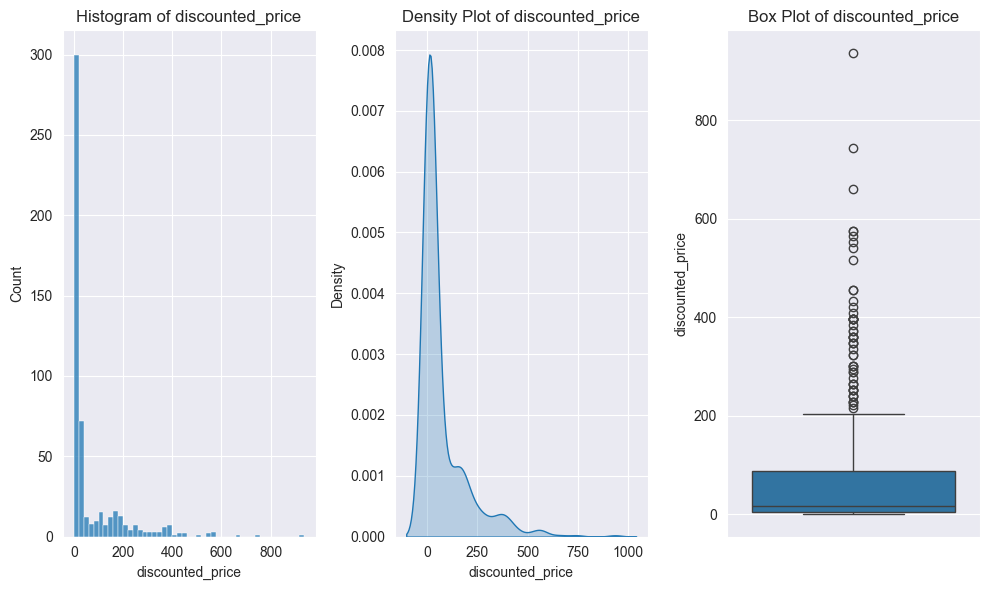

actual_price (right skewed: 3.0)


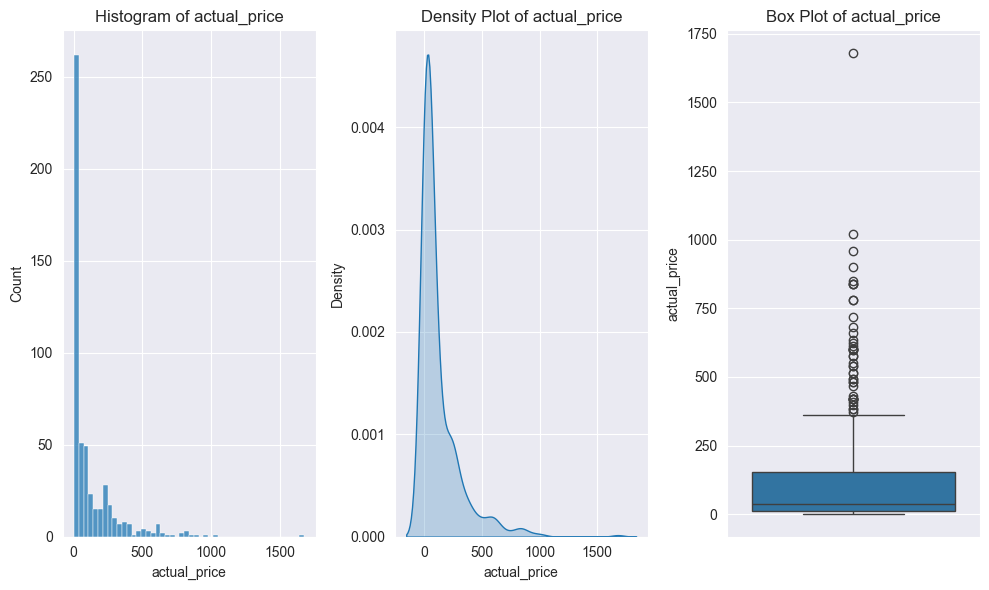

discount_percentage (left skewed: -0.29)


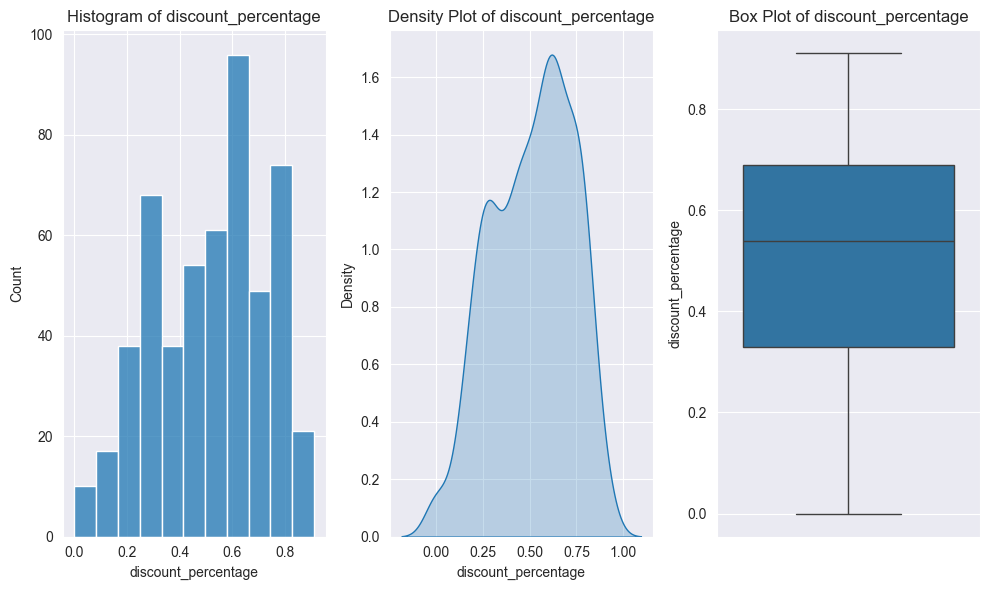

rating (left skewed: -1.01)


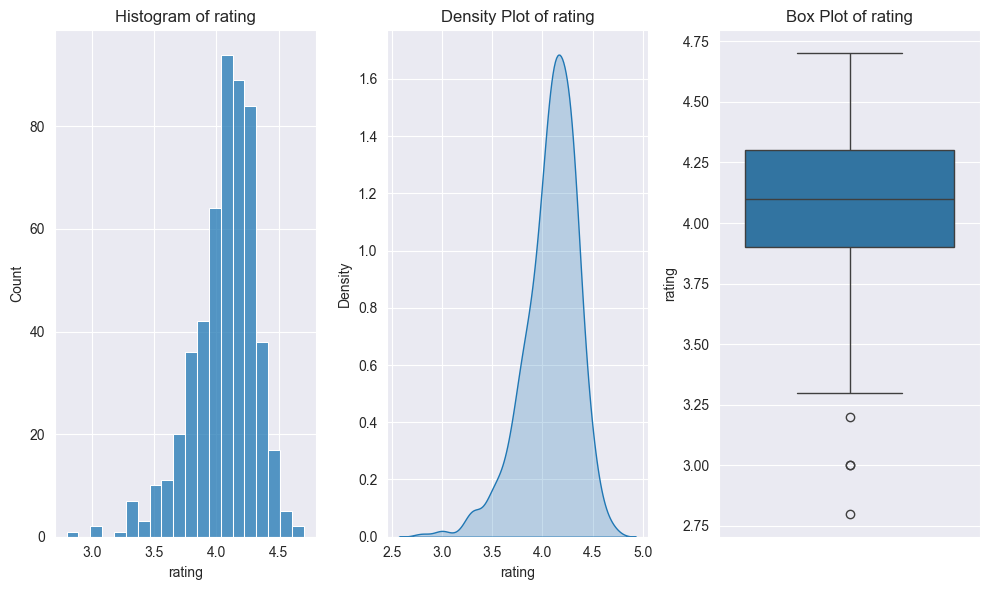

rating_count (right skewed: 4.18)


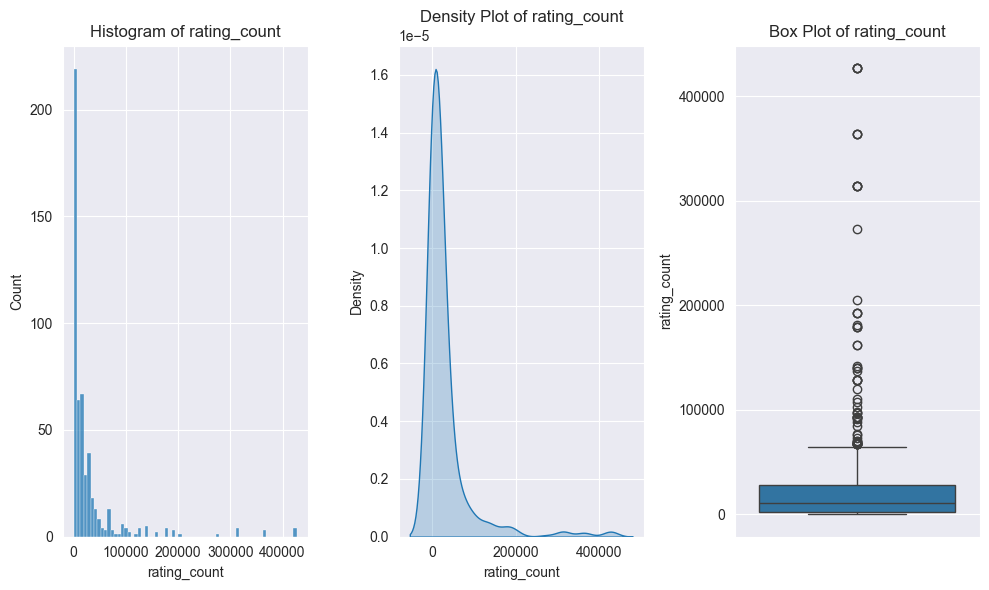

discount_amount (right skewed: 3.44)


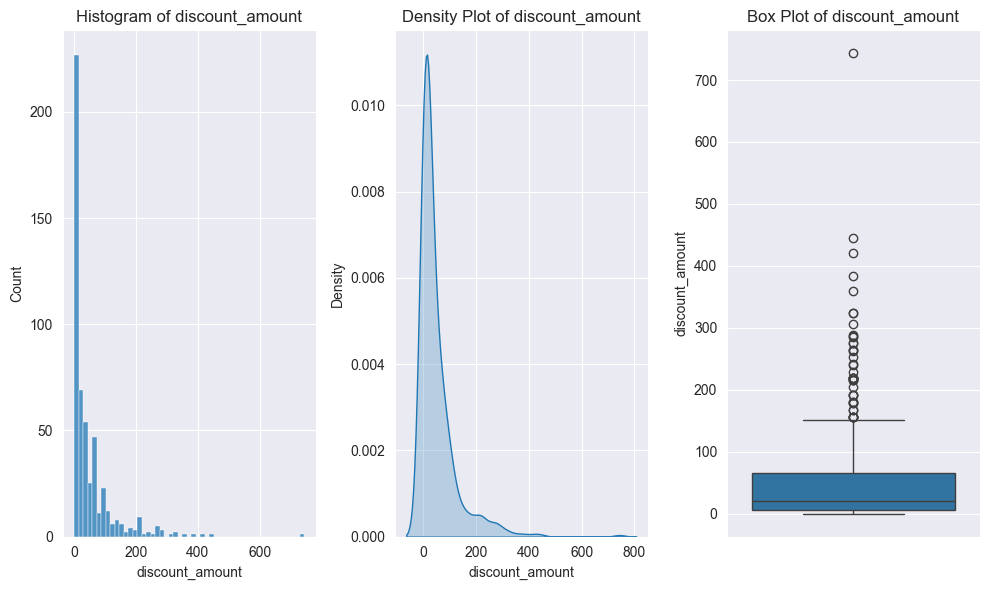

price_to_rating (right skewed: 2.6)


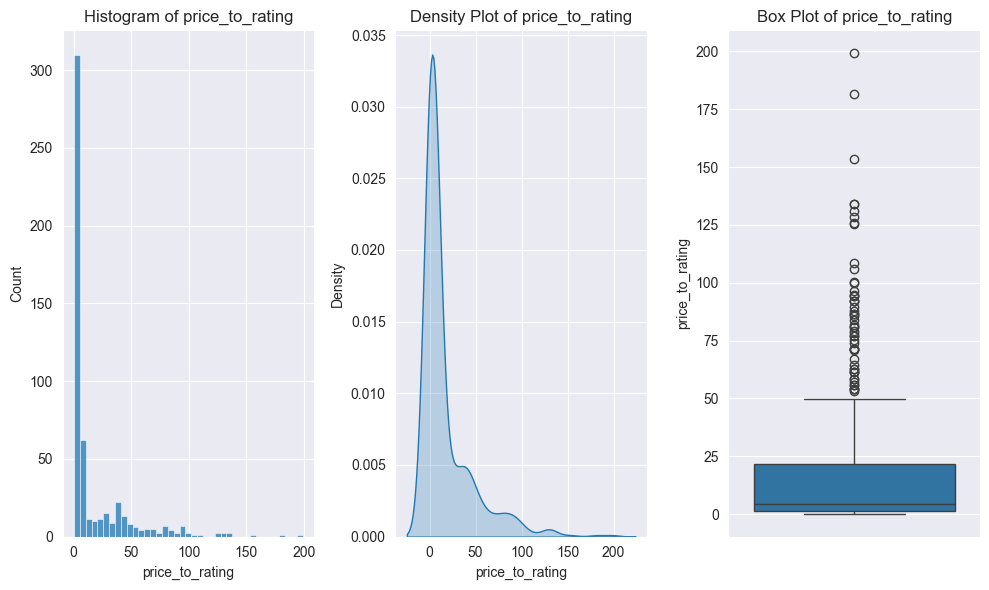

review_sentiment (right skewed: 0.03)


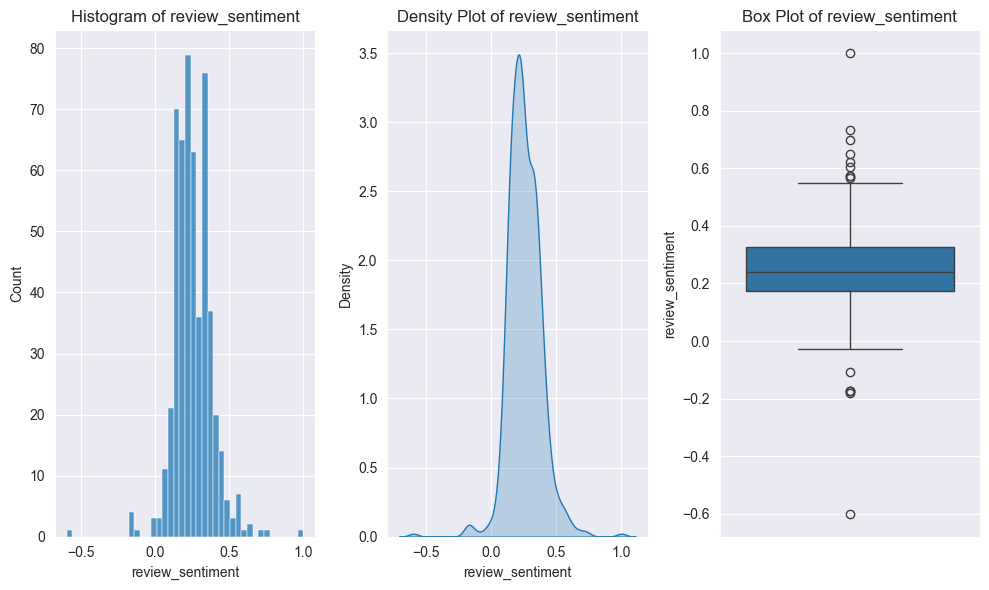

In [22]:
# Identifying the numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# Univariate Analysis Visualization
for col in numerical_columns:
    skewness = round(data[col].skew(), 2)
    if skewness > 0:
        print(f"{col} (right skewed: {skewness})")
    elif skewness < 0:
        print(f"{col} (left skewed: {skewness})")
    else:
        print(f"{col} (normal distribution)")
        
    plt.figure(figsize=(10, 6))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[col], kde=False)
    plt.title(f"Histogram of {col}")
    
    # Density Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(data[col], fill=True)
    plt.title(f"Density Plot of {col}")
    
    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[col])
    plt.title(f"Box Plot of {col}")
    
    plt.tight_layout()
    plt.show()


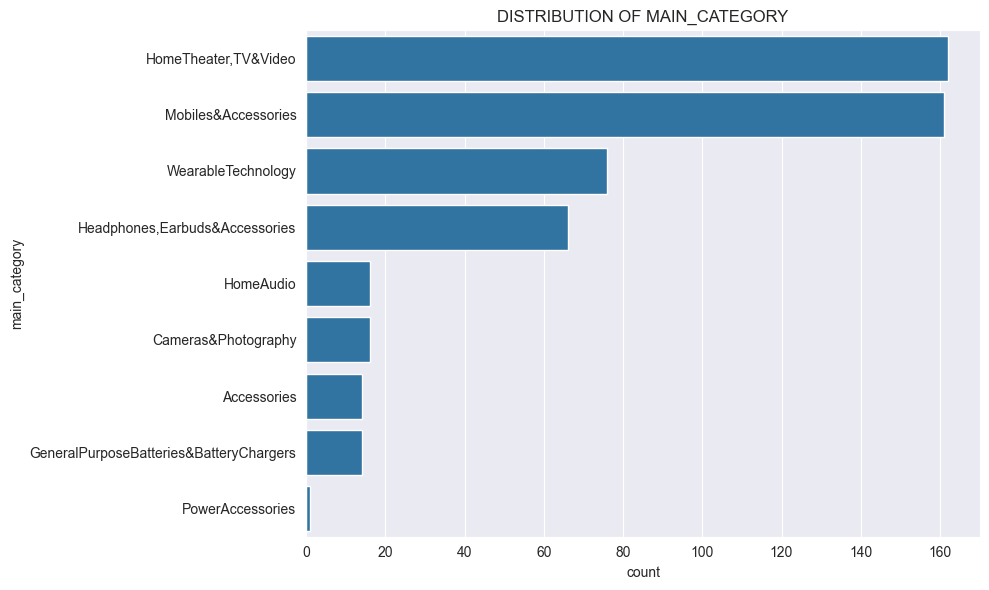

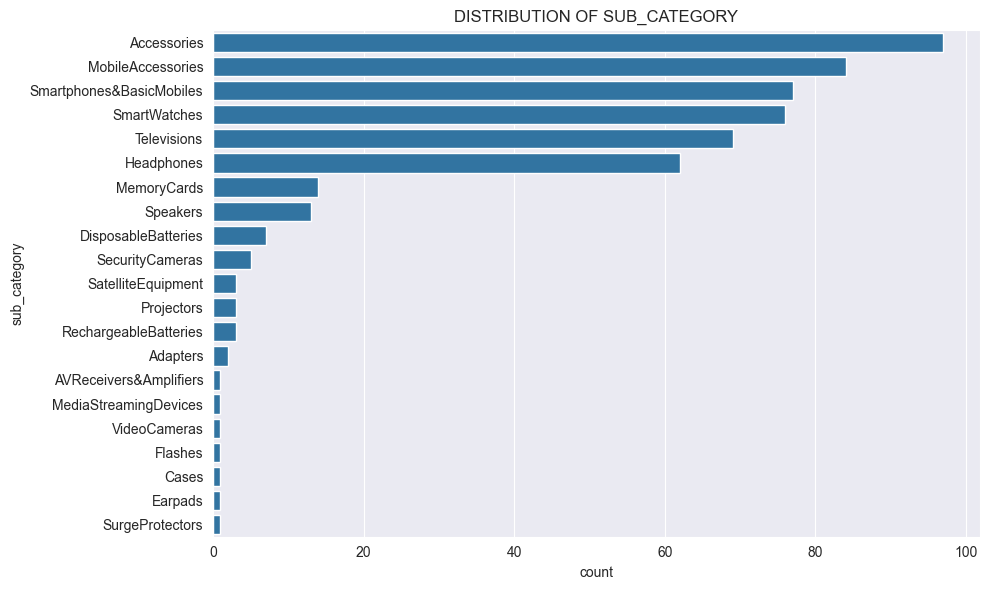

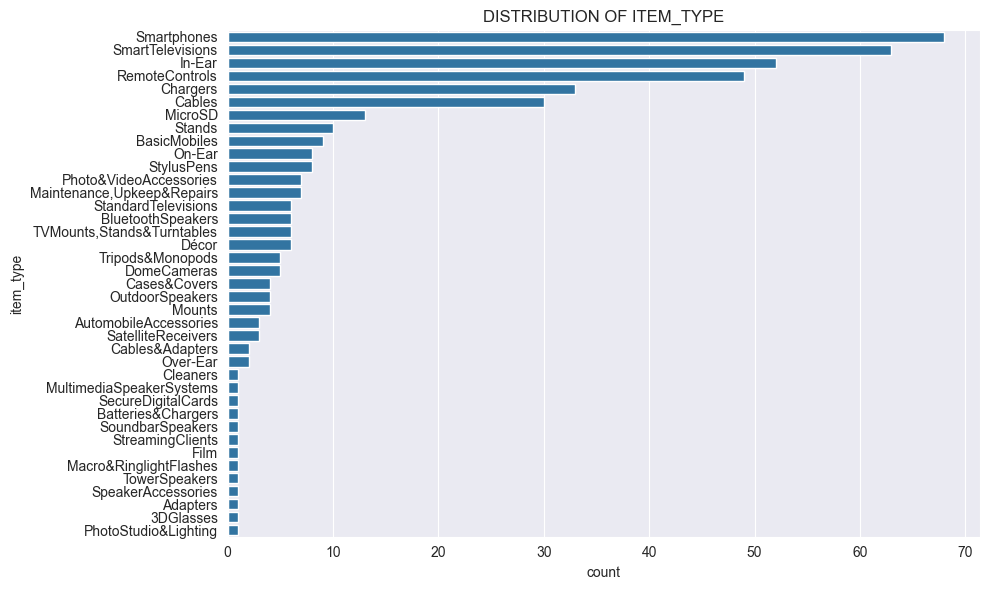

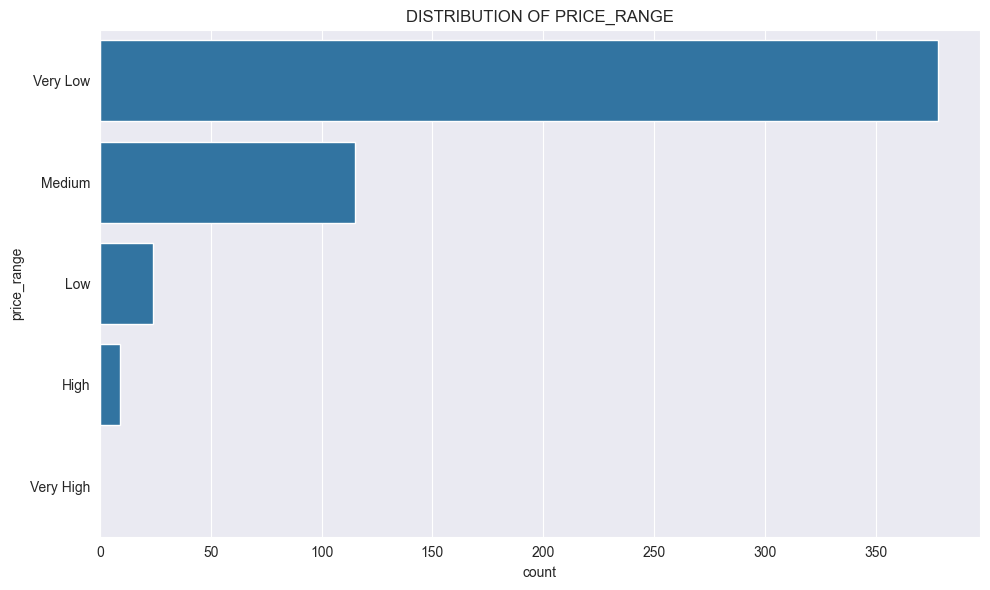

In [23]:
# Visualization of univariate analysis on categorical columns
for col in ['main_category', 'sub_category', 'item_type', 'price_range']:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}".upper())
    plt.xlabel('count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [24]:
def show_column_percentages(data: pd.DataFrame, columns: [str]) -> None:
    """
    Function to display the percentages of each of the provided columns.
    """
    for col in columns:
        # DataFrame containing value counts and percentage info
        percentage_df = pd.DataFrame(data=data[col].value_counts())

        # Divide the count of each category/item-type by  sum of all counts
        percentage_df['percent_of_column'] = percentage_df['count'] / percentage_df['count'].sum()
        percentage_df['percent_of_column'] = percentage_df['percent_of_column'].round(2)
        
        # Divide the count of each category/item-type name by  total number of entries in the electronics dataset
        percentage_df['percent_of_all_data'] = percentage_df['count'] / data.shape[0]
        percentage_df['percent_of_all_data'] = percentage_df['percent_of_all_data'].round(2)
        
        print(f"{percentage_df.head()}\n{'-' * 77}")
        

In [25]:
# Display the percentage of each category/item-type entry of the dataset
show_column_percentages(data=data, columns=['main_category', 'sub_category', 'item_type', 'price_range'])

                                count  percent_of_column  percent_of_all_data
main_category                                                                
HomeTheater,TV&Video              162               0.31                 0.31
Mobiles&Accessories               161               0.31                 0.31
WearableTechnology                 76               0.14                 0.14
Headphones,Earbuds&Accessories     66               0.13                 0.13
HomeAudio                          16               0.03                 0.03
-----------------------------------------------------------------------------
                          count  percent_of_column  percent_of_all_data
sub_category                                                           
Accessories                  97               0.19                 0.18
MobileAccessories            84               0.16                 0.16
Smartphones&BasicMobiles     77               0.15                 0.15
SmartWatches    

***
## Interpretations
- __Main Category__:
    - The most prominent categories are `Home Theater, TV & Video` and `Mobiles&Accessories` with each comprising of 31% of all electronics-related purchases.
    - `Wearable Technology` has a significant presence as well, comprising of 14% of all electronics purchases, but is less than half as prominent as the leading categories.
    - The distribution is not uniform, indicating that certain categories of electronics are more popular or have greater variation in products offered.
- __Sub-Category__:
    - `Accessories` is the most common sub-category, accounting for 19% within its column and 18% of all data.
    - Following closely are `Mobile Accessories` and `Smartphones & Basic Mobiles`, each with a significant presence in the dataset.
    - `SmartWatches` and `Televisions` also have notable counts, suggesting these are popular sub-categories within the electronics segment on Amazon
- __Item Type__:
    - `Smartphones` lead the item types with 16% share within its column and a 13% share of all data.
    - `Smart Televesions` and `In-Ear` type products like earphones are also among the top item types, with `Smart Televisions` having a slightly lesser count than `Smartphones`.
    - There is a rapid drop-off in count after the "Smartphones" category, with categories like "Remote Controls," "Chargers," and "Cases" following but with considerably fewer counts.
    - The distribution is heavily skewed towards "Smartphones," with all other categories having significantly fewer listings.
    - The histogram demonstrates a long tail distribution, where a small number of categories have high counts and a large number of categories have low counts.
- __Price Range__:
    - The price range `Very Low` has the highest count, with 378 items, making up 72% of the total data. This dominance in the distribution suggests that the majority of consumer electronics purchased on Amazon are in the most affordable price bracket. This could indicate a market that is highly price-sensitive or a large number of lower-cost items such as accessories or small electronics.
    - The `Medium` price range, with 115 items, accounts for 22% of the data. While still a significant portion, it's notably less than the `Very Low` range, indicating that while there's a market for mid-range products, it's considerably smaller than that for low-cost items.
    - The `High` price range is represented by just 9 items, which is 2% of the data. This small figure indicates that high-priced items are less common and likely represent a niche market with fewer buyers or less frequent purchases.
    - There are no items in the `Very High` price range, which is 0% of the data. This absence could be due to the dataset not including luxury or high-end electronics, or it could reflect a very limited market for such high-priced items on Amazon.

Amazon's consumer electronics market is primarily driven by affordable and mid-range priced items, with a **strong emphasis** on `mobile-related products` and `home entertainment`. Accessories that complement primary devices are in high demand, suggesting that consumers value both functionality and the augmentation of their main technology investments. There is a relatively small market for premium-priced electronics, which could indicate either a lower availability of such items on Amazon, a less frequent purchase cycle due to higher costs, or simply a consumer preference for more cost-effective solutions.

Amazon's electronics marketplace is characterized by a consumer preference for value-oriented purchases with a **significant investment** in `accessories` and `enhancements for mobile and smart home devices`. Sellers in the electronics market can leverage this insight to tailor their product assortment, pricing strategies, and marketing efforts to cater to the majority consumer base that favors affordability without compromising on technological advancements.

***
## Data Transformation
Discounted price, actual price, discounted amount, rating, and price-to-rating ratio are strongly right-skewed. 
As such, a log transformation can help in normalization so that the aforementioned variables can maintain a standard scale relative to other variables.

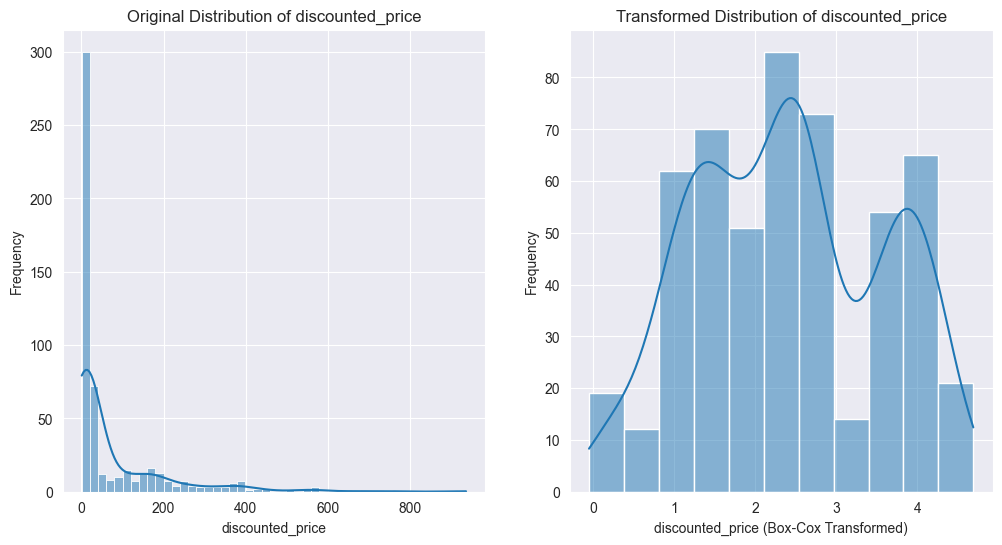

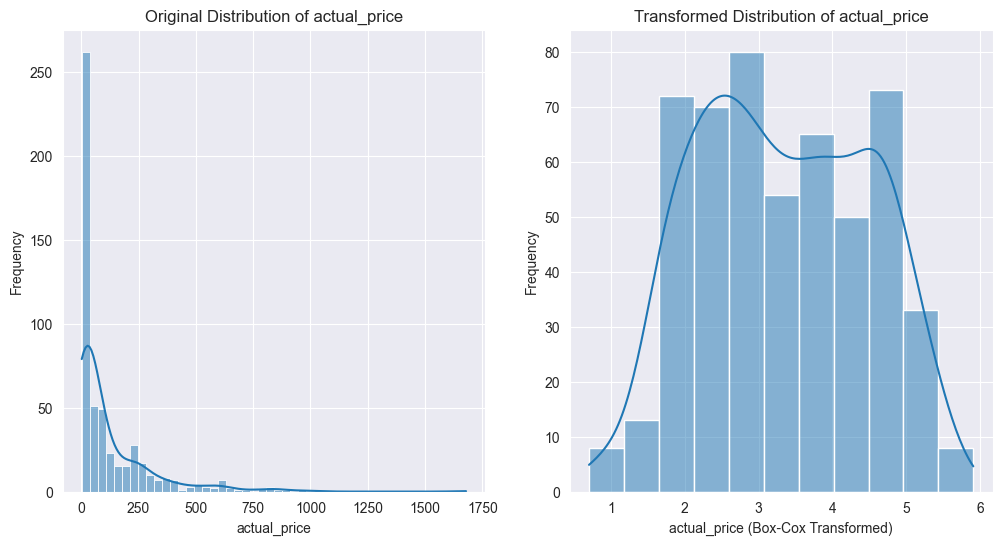

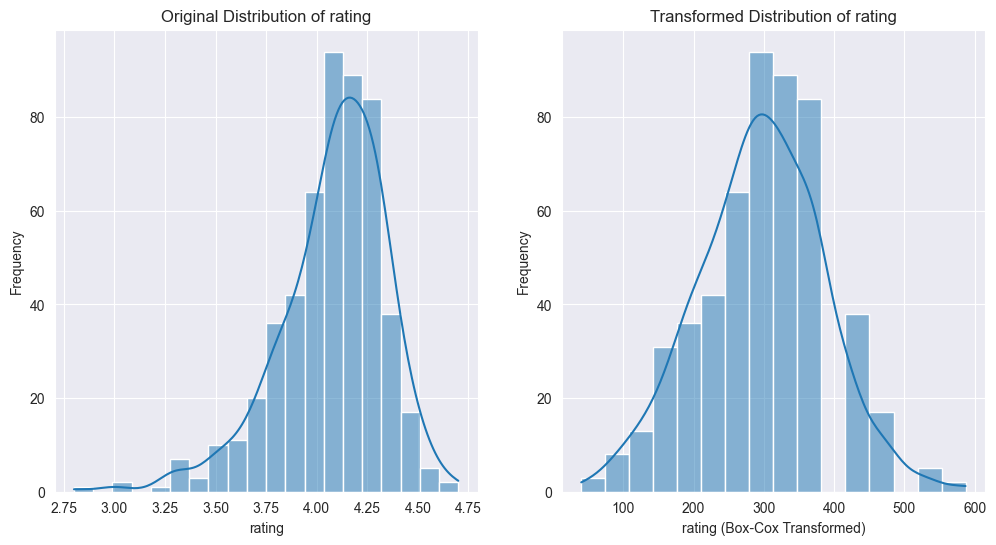

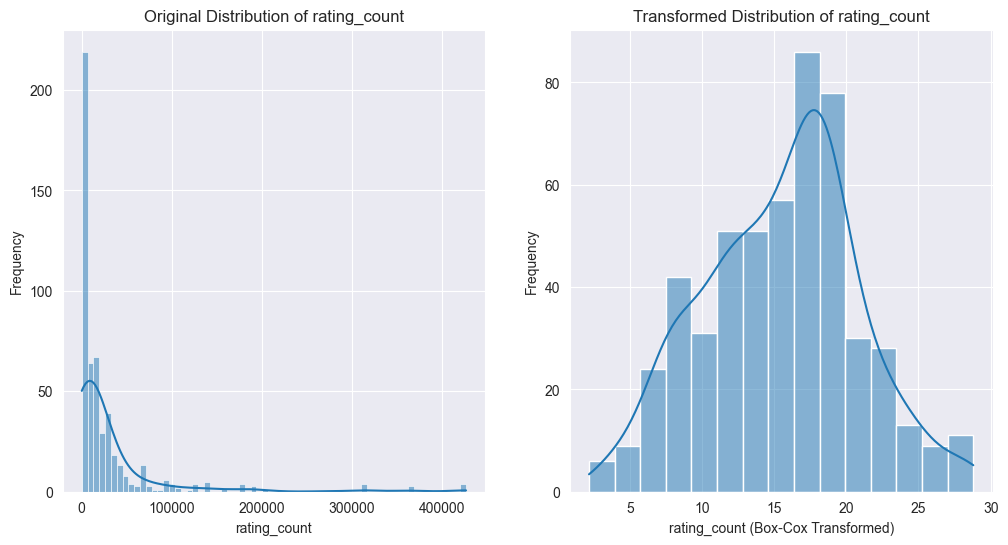

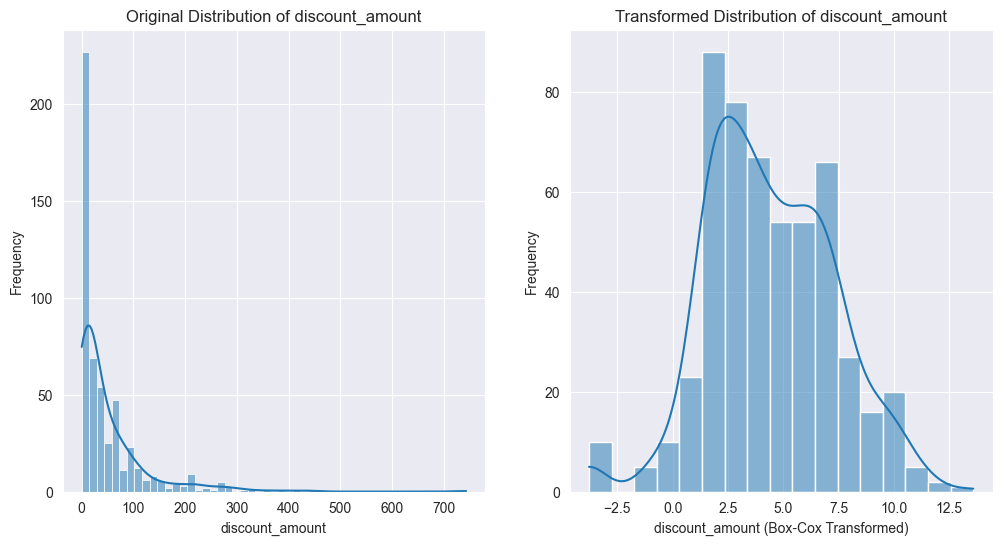

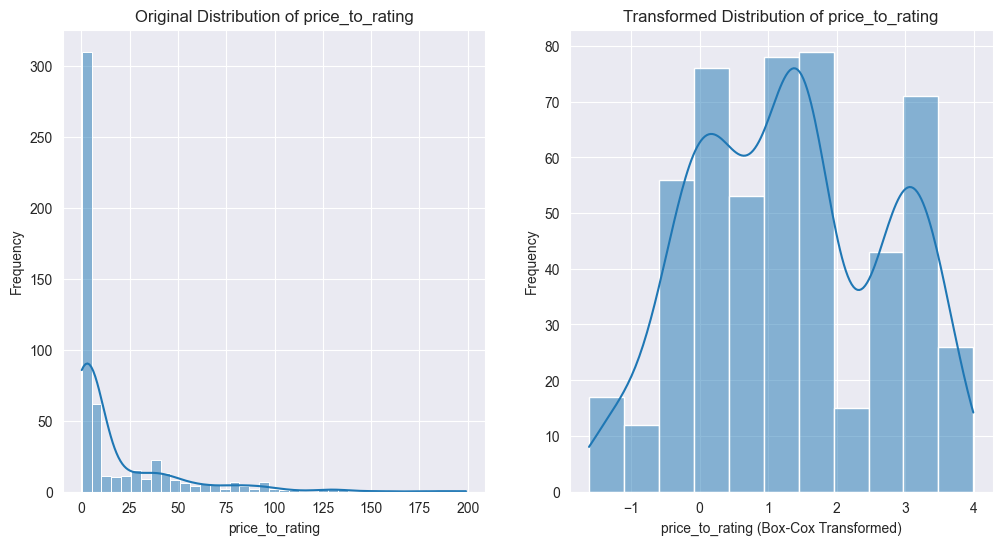

Transformation applied to columns: ['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_amount', 'price_to_rating']


In [26]:
# Identify columns that may benefit from transformation
# Look for skewness in numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
skewed_columns = [
    col for col in numerical_columns if data[col].skew() > 1 or data[col].skew() < -1
]

# Apply Box-Cox Transformation to skewed columns
for column in skewed_columns:
    # Adding a small value to avoid issues with 0 or negative values
    data[f'{column}_bc_transform'], fitted_lambda = boxcox(data[column] + 1e-3)
    
    # Original distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Original Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data[f'{column}_bc_transform'].dropna(), kde=True)
    plt.title(f'Transformed Distribution of {column}')
    plt.xlabel(f'{column} (Box-Cox Transformed)')
    plt.ylabel('Frequency')
    plt.show()

print(f'Transformation applied to columns: {skewed_columns}')

The left side of each image shows the original distribution, and the right side shows the Box-Cox transformed distribution. 
The Box-Cox transformation has been applied to these columns to reduce skewness and make the data more normally distributed, which can improve the performance of many statistical models.

The columns that were transformed are:
- Discounted Price
- Actual Price
- Rating
- Rating Count
- Discount Amount
- Price-to-Rating

***
## EDA Bivariate Analysis
__Bivariate Analysis__ helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.
- __Numerical Variables__ -- Pair plots & Scatter plots.
- __Categorical Variables__ -- Stacked bar chart if the output variable is a classifier. Bar plots can be used if the output variable is continuous.

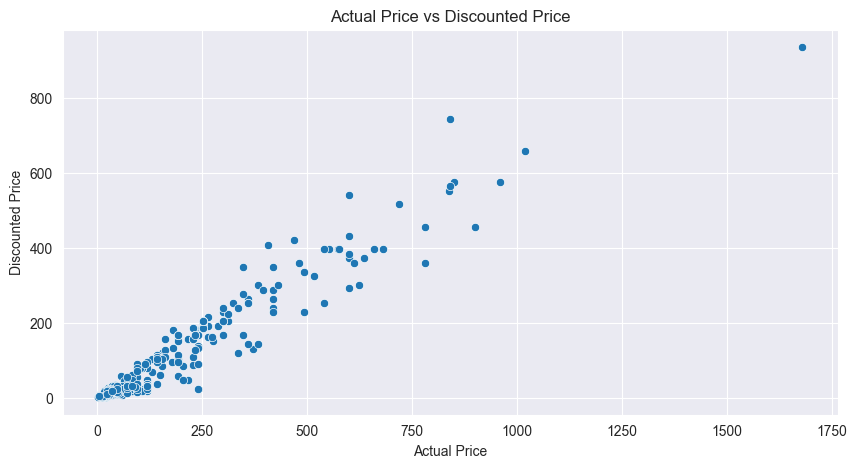

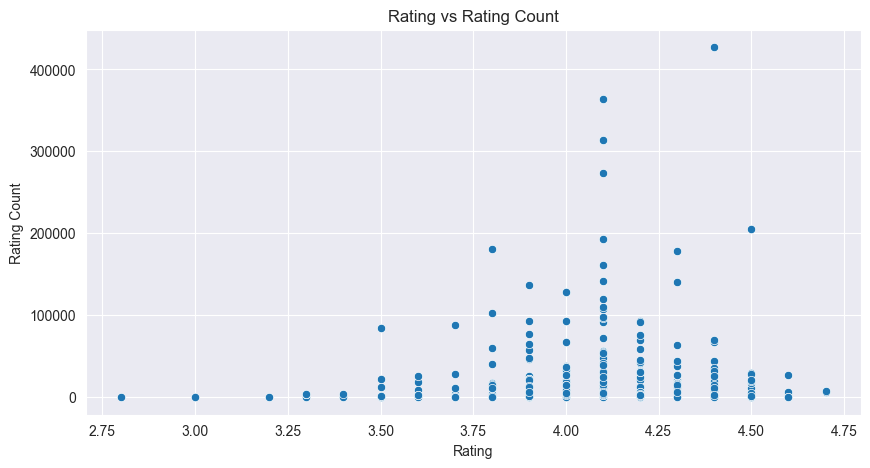

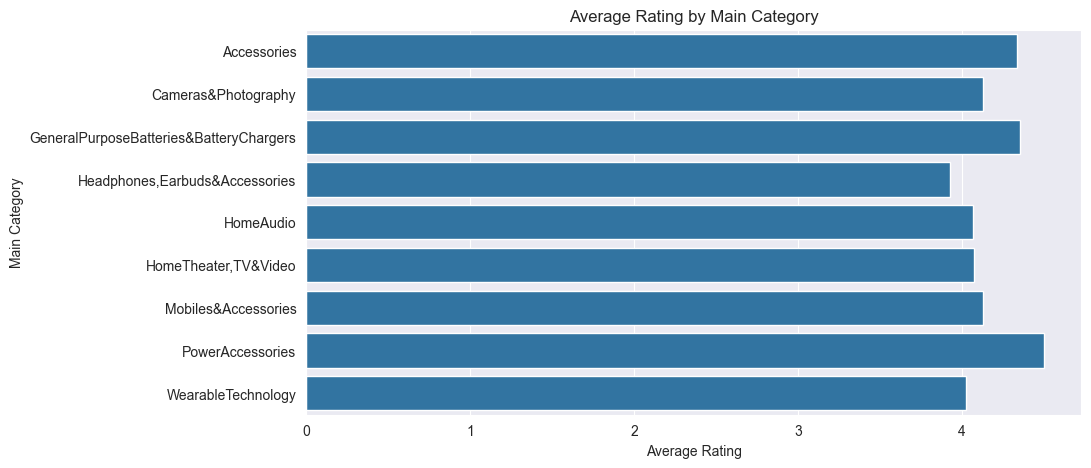

In [29]:
# Bivariate analysis
# Examining at the relationship between actual price and discounted price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='actual_price', y='discounted_price')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

# Examining the relationship between rating and rating count
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='rating', y='rating_count')
plt.title('Rating vs Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.show()

# Examining the relationship between main category and average rating
average_rating_by_category = data.groupby('main_category')['rating'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=average_rating_by_category, x='rating', y='main_category', errorbar=None)
plt.title('Average Rating by Main Category')
plt.xlabel('Average Rating')
plt.ylabel('Main Category')
plt.show()

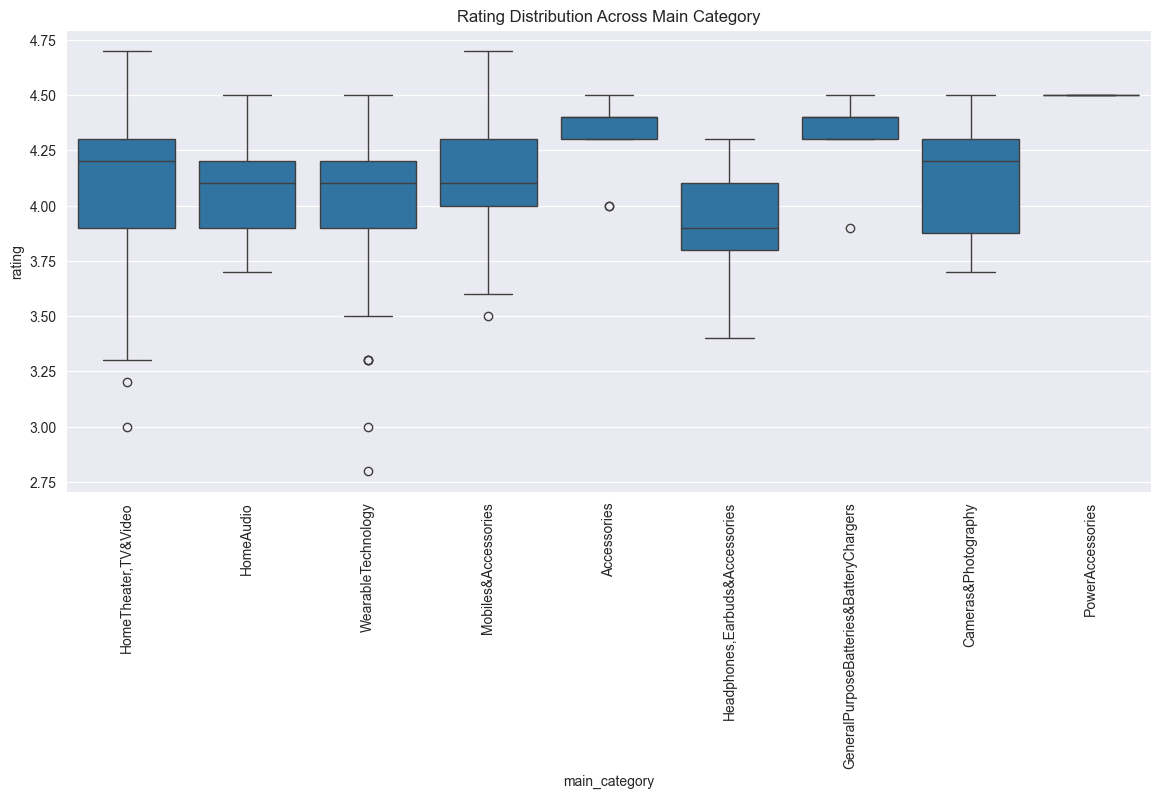

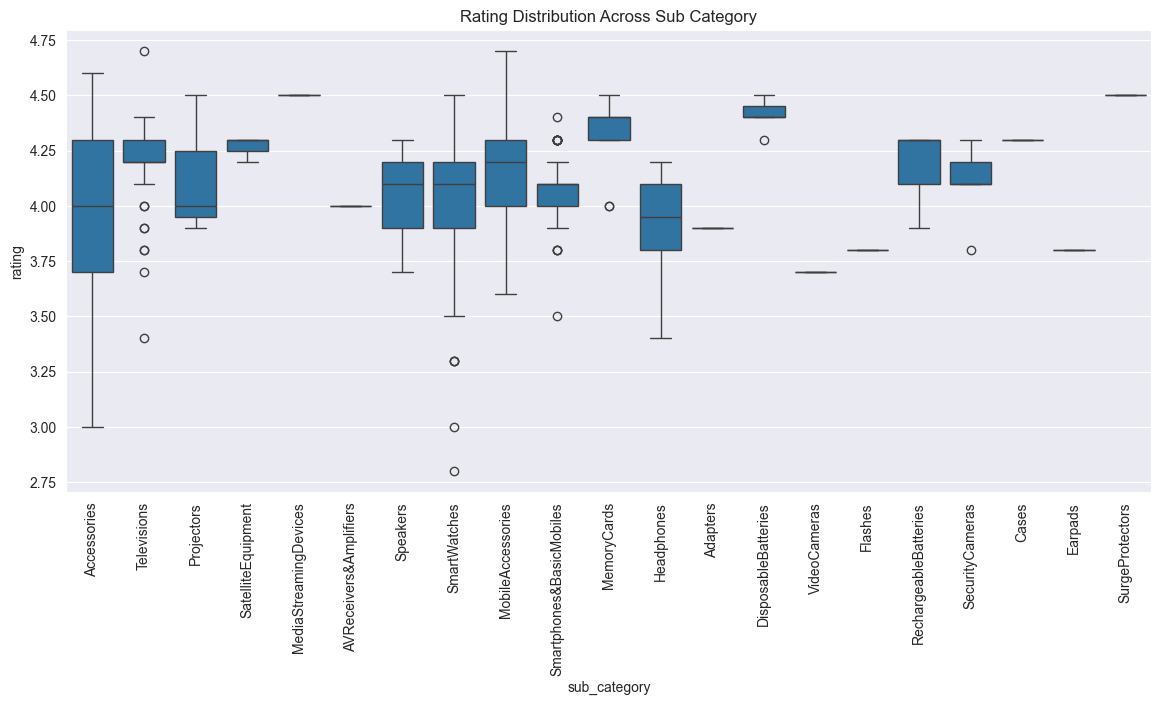

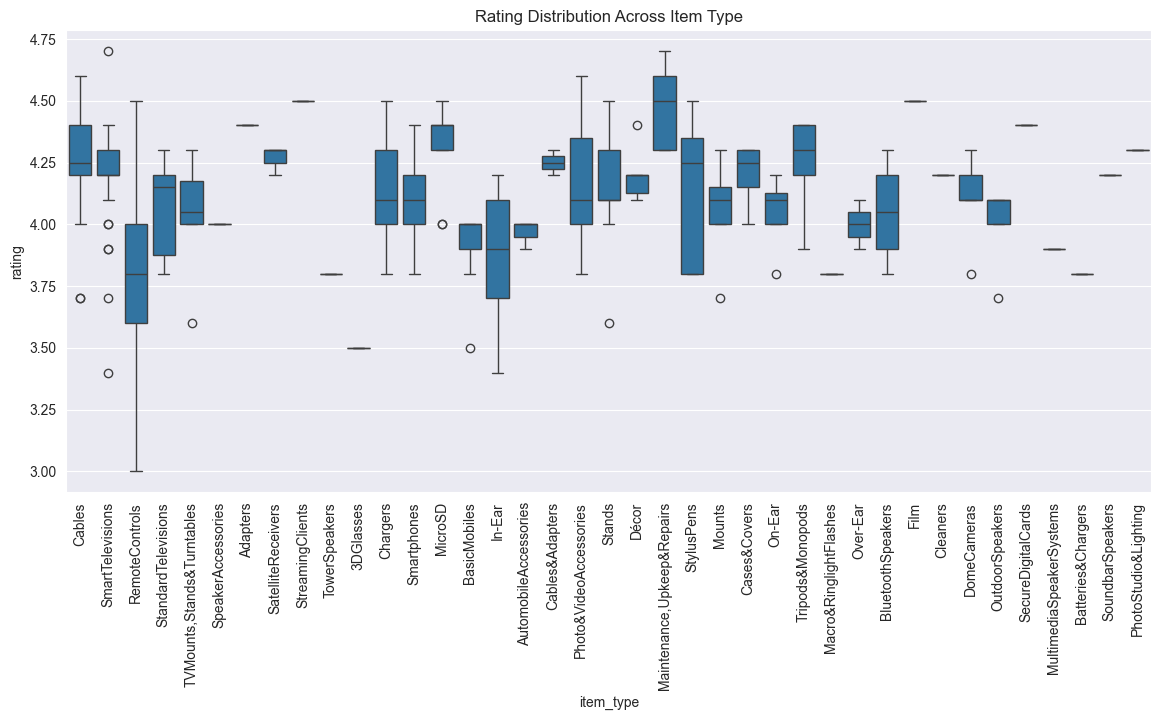

In [31]:
# Examining the relationship between ratings and different categories
for category in ['main_category', 'sub_category', 'item_type']:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=category, y='rating', data=data)
    plt.title(f"Rating Distribution Across {category.replace('_', ' ').title()}")
    plt.xticks(rotation=90)
    plt.show()